In [15]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import argparse
import glob
import os
from pathlib import Path
import random
import cv2
import matplotlib.pyplot as plt
import shutil


def parse_args(config='./configs/convnext/convnext_l_rcnn.py',pth='./convnext_l_rcnn.pth'):
        parser = argparse.ArgumentParser(description='inferance')
        parser.add_argument('--config',default=config, help='test config file path')
        parser.add_argument('--checkpoint',default=pth, help='checkpoint file')
        parser.add_argument('--data-path',type=str,default='./demo/img',help=' data path')
        parser.add_argument('--device',choices=['cpu','cuda'],default='cpu',help='device')
        parser.add_argument('--local-rank',type=int,default=0)
        parser.add_argument('--output',type=str,default='demo/convlrcnn',help='output folder')
        args=parser.parse_known_args()[0]
        return args
    
def get_data(dir):
    if Path(dir):
        data=sorted(glob.glob(os.path.join(dir,'*.jpg')))
    return data
   
def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=1, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=0.4, thickness=1)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, 0.4, [225, 255, 255], thickness=1, lineType=cv2.LINE_AA)
            

load checkpoint from local path: ./work_dirs/convnext_l_rcnn/convnext_l_rcnn.pth


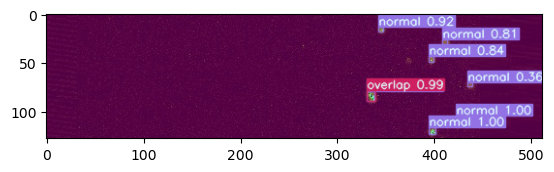

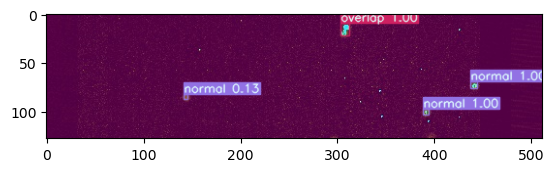

In [16]:
args=parse_args()
if os.path.exists(args.output):
    shutil.rmtree(args.output)
os.makedirs(args.output)
imgs=get_data(args.data_path)
model=init_detector(args.config,args.checkpoint,args.device)
classes=['normal','overlap']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(classes))]
for img in imgs:
    result=inference_detector(model,img)
    save_path=str(Path(args.output)/Path(args.output).name)+str(Path(img).name)
    src=cv2.imread(img)
    for cls in range(len(result)):
        for x1,y1,x2,y2,conf in result[cls]:
            label = '%s %.2f' % (classes[cls], conf)
            num+=1
            plot_one_box((x1,y1,x2,y2),src,color=colors[cls],label=label,line_thickness=2)
    cv2.imwrite(save_path,src)         
    plt.imshow(src)
    plt.show()
